In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Our camera model
import camera

In [3]:
# Read 3D data

points = np.loadtxt('3D/house.p3d').T
points = np.vstack((points,np.ones(points.shape[1]))) # Hom coordinates

In [4]:
# Set up a simple camera

P = np.hstack((np.eye(3),np.array([[0],[0],[-10]])))
cam = camera.Camera(P)
x = cam.project(points)

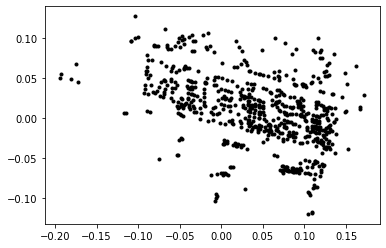

In [5]:
# Plot projections

plt.figure()
plt.plot(x[0],x[1],'k.')
plt.show()

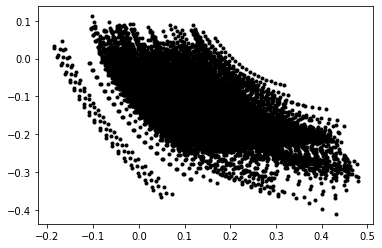

In [6]:
# Incrementally rotating the camera

# Create transformation
r = 0.05*np.random.rand(3)
rot = camera.rotation_matrix(r)

# Rotate camera and project
plt.figure()
for t in range(20):
    cam.P = cam.P@rot
    x = cam.project(points)
    plt.plot(x[0],x[1],'k.')
plt.show()

In [7]:
# QR factorization of P to find K,R,t

# Test case
K = np.array([[1000,0,500],[0,1000,300],[0,0,1]])
tmp = camera.rotation_matrix([0,0,1])[:3,:3]
Rt = np.hstack((tmp,np.array([[50],[40],[30]])))
cam = camera.Camera(K@Rt)

print(f'{K}')
print(f'{Rt}')
print(f'{cam.factor()}')

[[1000    0  500]
 [   0 1000  300]
 [   0    0    1]]
[[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]
(array([[1000.,    0.,  500.],
       [   0., 1000.,  300.],
       [   0.,    0.,    1.]]), array([[ 0.54030231, -0.84147098,  0.        ],
       [ 0.84147098,  0.54030231,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]), array([50., 40., 30.]))
